In [1]:
import numpy as np
import pandas as pd 
import os
import sys
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
input_dir="features"
features=["boxing","handclapping","handwaving","jogging","running","walking"]

In [3]:
label_map = {name: i for i, name in enumerate(features)}

X_list = [] 
y_list = [] 

for feature in features:
    folder_path = os.path.join(input_dir, feature)
        
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".npz"):
            file_path = os.path.join(folder_path, file_name)
            
            data = np.load(file_path)
            keypoints = data['keypoints'] 
            
            keypoints = keypoints.reshape(keypoints.shape[0], -1) 
            
            X_list.append(keypoints)
            y_list.append(label_map[feature])

print(f"Loaded {len(X_list)} samples.")
print(f"First sample shape: {X_list[5].shape}")

Loaded 599 samples.
First sample shape: (460, 75)


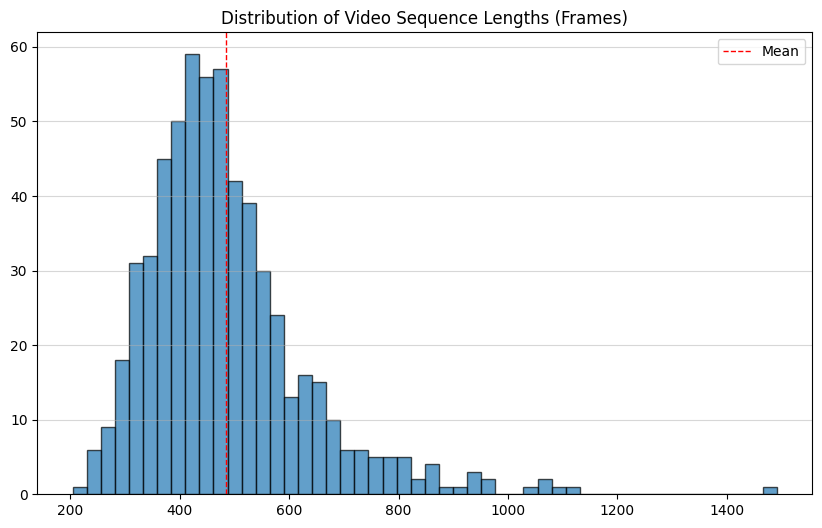

Min length: 204
Max length: 1492
Mean length: 483.67
Median length: 460.0
90th percentile: 664.0 (Covers 90% of videos)


In [4]:
sequence_lengths = [len(x) for x in X_list]

plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Video Sequence Lengths (Frames)')
plt.axvline(np.mean(sequence_lengths), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

print(f"Min length: {np.min(sequence_lengths)}")
print(f"Max length: {np.max(sequence_lengths)}")
print(f"Mean length: {np.mean(sequence_lengths):.2f}")
print(f"Median length: {np.median(sequence_lengths)}")

p90 = np.percentile(sequence_lengths, 90)

print(f"90th percentile: {p90} (Covers 90% of videos)")

In [5]:
all_data = np.concatenate(X_list, axis=0)
min_vals = all_data.min(axis=0)
max_vals = all_data.max(axis=0)

X_norm = []
for x in X_list:
    x_n = (x - min_vals) / (max_vals - min_vals + 1e-8)
    X_norm.append(x_n)

print(X_norm[0])

[[0.47425944 0.18984227 0.89751416 ... 0.51057637 0.86622876 0.21609178]
 [0.47623673 0.18964058 0.9173548  ... 0.51061904 0.8661876  0.21377449]
 [0.47830302 0.1869193  0.8901828  ... 0.5106646  0.8771213  0.14649706]
 ...
 [0.48636717 0.22785364 0.6816109  ... 0.5551204  0.8771171  0.7032873 ]
 [0.490373   0.21434836 0.64387506 ... 0.5571541  0.8716582  0.7157415 ]
 [0.49041602 0.21699913 0.6431996  ... 0.5550838  0.8744572  0.68826056]]


In [6]:
max_len=650
feature_dim = X_list[0].shape[1] 
X_padded = np.zeros((len(X_list), int(max_len), feature_dim))
for i, x in enumerate(X_norm):
    seq_len = len(x)
    if seq_len <= max_len:
        X_padded[i, :seq_len, :] = x
    else:
        X_padded[i, :, :] = x[:int(max_len), :] 

In [7]:
print(X_padded[0])

[[0.47425944 0.18984227 0.89751416 ... 0.51057637 0.86622876 0.21609178]
 [0.47623673 0.18964058 0.91735482 ... 0.51061904 0.86618757 0.21377449]
 [0.47830302 0.1869193  0.89018279 ... 0.51066458 0.87712133 0.14649706]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, np.array(y_list), test_size=0.2, random_state=42)

In [9]:
from tslearn.svm import TimeSeriesSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)

In [11]:
param_grid = {
    'gamma': [0.01, 0.1, 1.0, "auto"],
    'C': [0.1, 1, 10]
}

grid = GridSearchCV(
    TimeSeriesSVC(kernel="gak"),
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2  # Prints progress
)

grid.fit(X_train, y_train)

print(f"Best Params: {grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid.best_score_:.4f}")

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
final_acc = accuracy_score(y_test, y_pred)

print(f"\nFinal Test Set Accuracy: {final_acc:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=features, yticklabels=features)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test, y_pred, target_names=features))


Fitting 3 folds for each of 12 candidates, totalling 36 fits


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tslearn.shapelets import LearningShapelets
from keras.optimizers import Adam

c:\kod\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from tslearn.shapelets import LearningShapelets
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Clear GPU memory if available (Optional, good practice)
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# ==========================================
# Step 1: Dimensionality Reduction (Crucial Fix)
# ==========================================
print(f"Original Data Shape: {X_train.shape}") # (N, 650, 75)

# Flatten time and samples to treat each timeframe as a data point
N, T, D = X_train.shape
X_train_flat = X_train.reshape(-1, D)
X_test_flat = X_test.reshape(-1, D)

# Standardize FIRST
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Apply PCA to reduce 75 channels -> 12 components
# This fixes the "Curse of Dimensionality" and speeds up initialization
pca = PCA(n_components=12) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Reshape back to Time Series format: (N, T, 12)
X_train_reduced = X_train_pca.reshape(N, T, -1)
X_test_reduced = X_test_pca.reshape(X_test.shape[0], T, -1)

print(f"Reduced Data Shape: {X_train_reduced.shape}") 

# ==========================================
# Step 2: Train Shapelet Model
# ==========================================

# Stronger optimizer to escape local minima
optimizer = Adam(learning_rate=0.01)

# Initialize Model (Parameter fixed)
shp_clf = LearningShapelets(
    n_shapelets_per_size={30: 10, 50: 10}, 
    max_iter=400,
    verbose=1,
    optimizer=optimizer,
    scale=False,             # We already scaled manually
    random_state=42,
    weight_regularizer=0.0,  # 0.0 allows learning complex shapes
    batch_size=32
)

# Fit
print("\nStarting Shapelet Training on PCA-reduced data...")
# It may pause for 10-20 seconds here for K-Means initialization (this is normal)
shp_clf.fit(X_train_reduced, y_train)

# ==========================================
# Step 3: Evaluation
# ==========================================
train_acc = shp_clf.score(X_train_reduced, y_train)
test_acc = shp_clf.score(X_test_reduced, y_test)

print(f"\nFinal Train Accuracy: {train_acc:.4f}")
print(f"Final Test Accuracy:  {test_acc:.4f}")

# Plot Loss
if hasattr(shp_clf, 'history_'):
    plt.plot(shp_clf.history_['loss'])
    plt.title('Shapelet Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

Original Data Shape: (479, 650, 75)
Reduced Data Shape: (479, 650, 12)

Starting Shapelet Training on PCA-reduced data...


c:\kod\.venv\Lib\site-packages\tslearn\shapelets\shapelets.py:492: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "
c:\kod\.venv\Lib\site-packages\keras\src\layers\layer.py:982: UserWarning: Layer 'min_pooling_0' (of type GlobalMinPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Epoch 1/400


c:\kod\.venv\Lib\site-packages\keras\src\layers\layer.py:982: UserWarning: Layer 'min_pooling_1' (of type GlobalMinPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\kod\.venv\Lib\site-packages\keras\src\layers\layer.py:982: UserWarning: Layer 'min_pooling_0' (of type GlobalMinPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.1670 - categorical_crossentropy: 13.4261 - loss: 13.4261
Epoch 2/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.1670 - categorical_crossentropy: 13.4261 - loss: 13.4261
Epoch 3/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.1670 - categorical_crossentropy: 13.4261 - loss: 13.4261
Epoch 4/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.1670 - categorical_crossentropy: 13.4261 - loss: 13.4261
Epoch 5/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.1670 - categorical_crossentropy: 13.4261 - loss: 13.4261
Epoch 6/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - categorical_accuracy: 0.1670 - categorical_crossentropy: 13.4261 - loss: 13.4261
Epoch 7/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - categorical_accuracy: 0.1670 - categorical_crossentropy: 13.4261 - loss: 13.4261
Epoch 8/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - categorical_a

KeyboardInterrupt: 

In [ ]:
X_train_dist = shp_clf.transform(X_train)
X_test_dist = shp_clf.transform(X_test)

print(f"Transformed Train Shape: {X_train_dist.shape}") # Should be (N, 10)
print(f"Transformed Test Shape: {X_test_dist.shape}")

# Convert to PyTorch Tensors
train_dataset = TensorDataset(
    torch.tensor(X_train_dist, dtype=torch.float32), 
    torch.tensor(y_train, dtype=torch.long)
)
test_dataset = TensorDataset(
    torch.tensor(X_test_dist, dtype=torch.float32), 
    torch.tensor(y_test, dtype=torch.long)
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Dropout(0.3), 
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, num_classes)
        )
        
    def forward(self, x):
        return self.network(x)

# Initialize Model
model = MLP(input_size=X_train_dist.shape[1], num_classes=6)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ---------------------------------------------------------
# 4. Training Loop
# ---------------------------------------------------------
print("3. Training MLP...")
num_epochs = 50
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_losses.append(running_loss / len(train_loader))
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Plot Loss
plt.plot(train_losses)
plt.title("MLP Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# ---------------------------------------------------------
# 5. Evaluation
# ---------------------------------------------------------
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

from sklearn.metrics import accuracy_score, classification_report

print(f"MLP Test Accuracy: {accuracy_score(all_labels, all_preds):.4f}")
print(classification_report(all_labels, all_preds, target_names=features))